In [1]:
# Code cell 1
# Import pandas
import pandas as pd

# Create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("./data/titanic-train.csv")

In [2]:
# Code cell 2
# verify the contents of the training dataframe using the pandas info() method.
# training.?

# SOLUTION
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


In [3]:
# Code cell answer 2
# Are there missing values in the data set?

# SOLUTION
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          713
Embarked         1
dtype: int64

In [4]:
# Code cell 3
# View the first few rows of the data

# SOLUTION
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [5]:
# Code cell 4
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [6]:
# Code cell 5
# View the first few rows of the data again

# SOLUTION
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [7]:
# Code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [8]:
# Code cell 7
# Verify that the missing values for the age variable have been eliminated.

# SOLUTION
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S


In [9]:
# Code cell 8
# Create the array for the target values
y_target = training["Survived"].values
#y_target

In [10]:
# Code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
# Create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values
#X_input

In [11]:
# Code cell 10
# Import the tree module from the sklearn library
from sklearn import tree

# Create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train the model using the fit() method of the decision tree object. 
# Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [12]:
# Code cell 11
clf_train.score(X_input, y_target)

0.8163934426229508

In [13]:
# Code cell 12
# from sklearn.externals.six import StringIO
from six import StringIO
with open("./data/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [14]:
# Code cell 13
# Run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng ./data/titanic.dot -o ./data/titanic.png

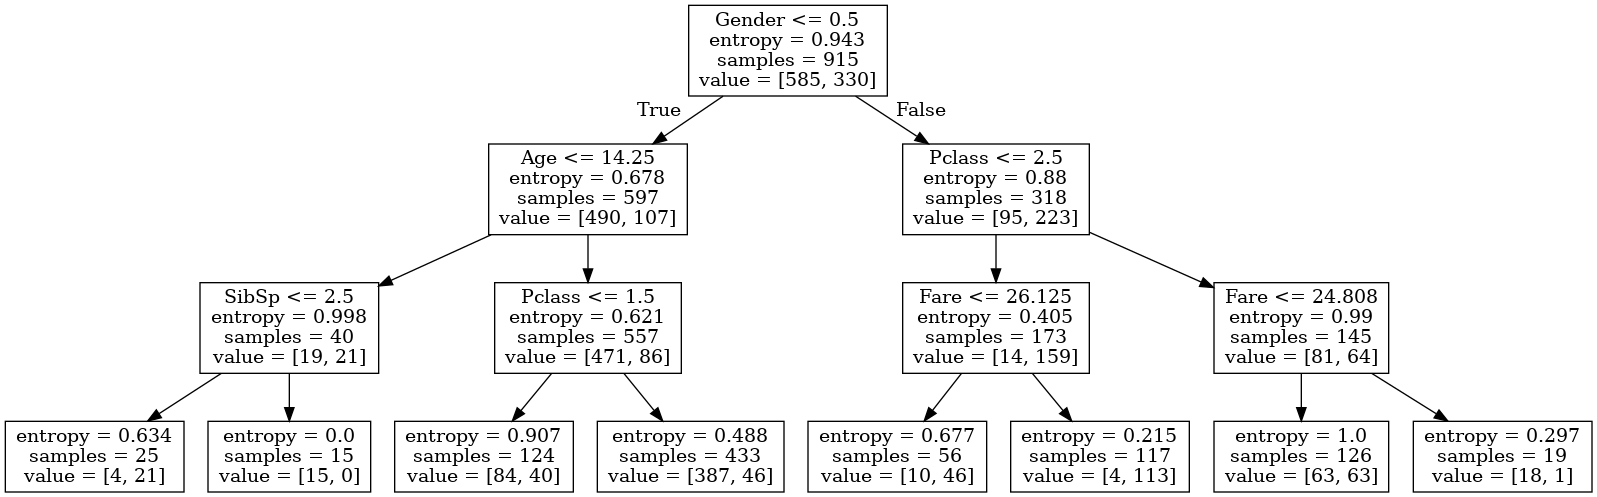

In [15]:
# Code cell 14
# Import the Image module from the Ipython.display libary
from IPython.display import Image

# Display the decison tree graphic
Image("./data/titanic.png")

In [16]:
# Code cell 15-1
# Import the file into the 'testing' dataframe.
testing = pd.read_csv("./data/titanic-test.csv")

In [17]:
# Code cell 15-2
testing.shape

(393, 12)

In [18]:
# Code cell 15-3
testing.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          300
Embarked         1
dtype: int64

In [19]:
# Code cell 16
# Replace the Gender labels in the testing dataframe
# Hint: look at Code cell 4

# SOLUTION
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [20]:
# Code cell 17
# Use the fillna method of the testing dataframe column "Age" 
# to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [21]:
# Code cell 18-1
# Verify the data preparation steps. Enter and run both the info and head 
# methods from here, by entering and running one and then the other.

# SOLUTION
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    int64  
 5   Age          393 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 37.0+ KB


In [22]:
# Code cell 18-2
# Verify the data preparation steps. Enter and run both the info and head 
# methods from here, by entering and running one and then the other.

# SOLUTION
testing.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S


In [23]:
# Code cell 19
# Create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

In [24]:
# Code cell 20
# Apply the model to the testing data and store the result in a pandas dataframe.
# Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

# Convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

# Display the first few rows of the data set

# SOLUTION
target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [25]:
# Code cell 21
# Import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./data/titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the result

# SOLUTION
print(acc)

0.7588832487309645


In [26]:
# Code cell 22-1
# Import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("./data/titanic_all.csv", usecols=['Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Fare'])
# View info for the new dataframe

# SOLUTION
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


In [27]:
# Code cell 22-2
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,1,151.5500
2,0,1,female,2.0000,1,151.5500
3,0,1,male,30.0000,1,151.5500
4,0,1,female,25.0000,1,151.5500


In [28]:
# Code cell 23
# Label the gender variable with 0 and 1

# SOLUTION
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [29]:
# Code cell 24
# Replace missing Age values with the mean age

# Display the first few rows of the data set

# SOLUTION
all_data["Age"].fillna(testing["Age"].mean(), inplace=True)
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


In [30]:
# Code cell 25
# Import train_test_split() from the sklearn.model_selection libary 
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

# Generate the four testing and training data arrays with the train_test_split() method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [31]:
# Code cell 26
# Create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)


In [32]:
# Code cell 27
# Score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train, y_train))
test_score = str(clf_train.score(X_test, y_test))

# Output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816
